# Facial Recognition System

## Import dependencies

In [28]:
! pip3 install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 850.4 kB/s eta 0:00:00 kB/s eta 0:00:01
  Using cached flask-2.3.3-py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.9 MB/s eta 0:00:00
  Using cached werkzeug-2.3.7-py3-none-any.whl (242 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached tensorflow_macos-2.13.0-cp310-cp310-macosx_12_0_arm64.whl (189.3 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-4.24.2-cp37-abi3-macosx_10_9_universal2.whl (409 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of filelock to determine w

  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116931 sha256=cae1999e9361569d6ef0ab682b7939c16f1aa60230a0177cdbe372678db1a1e6
  Stored in directory: /Users/danieldiaz/Library/Caches/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.3
    Uninstalling Werkzeug-2.2.3:
      Successfully uninstalled Werkzeug-2.2.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninst

In [63]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from random import choice
from sklearn.svm import SVC
# pip install mtcnn
from mtcnn.mtcnn import MTCNN 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import isdir
from glob import glob
import pickle

In [5]:
from mtcnn.mtcnn import MTCNN 
from PIL import Image
import numpy as np

image = Image.open('me.jpg')
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
face = pixels[y1:y2, x1:x2]

2023-09-22 21:54:33.338568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ddiaz/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-09-22 21:54:33.338604: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-22 21:54:33.338617: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DAU-IN8TL8VL3): /proc/driver/nvidia/version does not exist
2023-09-22 21:54:33.338816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 60ms/step


## block 0: tests

1/1 [==============================] - 0s 11ms/step


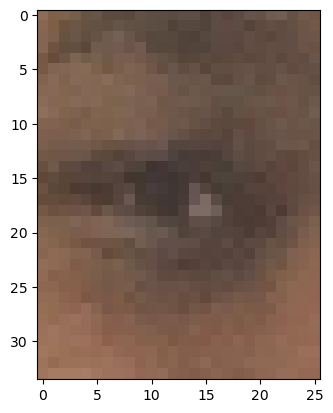

In [51]:
import cv2
import numpy as np

results = detector.detect_faces(pixels)

square_size = int(results[0]['box'][2] * 0.35)
test_pixels = pixels[results[0]['keypoints']['left_eye'][1] - square_size // 2:results[0]['keypoints']['left_eye'][1] - square_size // 2 + square_size, 
                     results[0]['keypoints']['left_eye'][0] - square_size // 2:results[0]['keypoints']['left_eye'][0] - square_size // 2 + square_size]


rescaled_image = cv2.resize(test_pixels, (26, 34), interpolation=cv2.INTER_LINEAR)
plt.imshow(rescaled_image)

# Convert to grayscale
gray_image = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2GRAY)

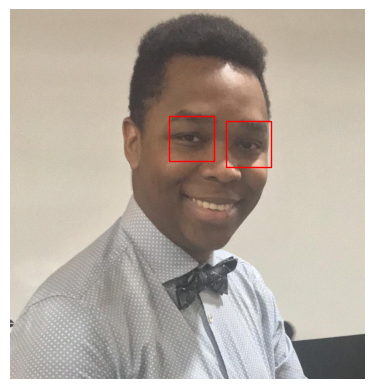

In [57]:
import matplotlib.patches as patches


fig, ax = plt.subplots()
ax.axis(False)
ax.imshow(pixels)

# Create a square patch
rect = patches.Rectangle((results[0]['keypoints']['left_eye'][0] - square_size // 2, results[0]['keypoints']['left_eye'][1] - square_size // 2), square_size, square_size, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((results[0]['keypoints']['right_eye'][0] - square_size // 2, results[0]['keypoints']['right_eye'][1] - square_size // 2), square_size, square_size, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Show the image
plt.show()

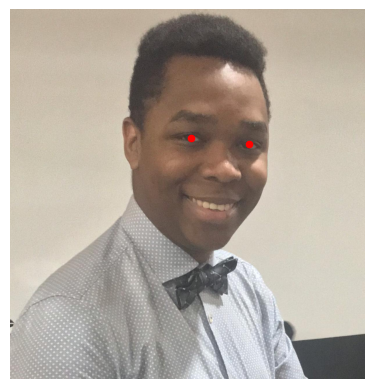

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axis(False)
ax.imshow(pixels)

# Draw a dot on the image
# Parameters: (x, y, color, size)
ax.scatter(results[0]['keypoints']['left_eye'][0], results[0]['keypoints']['left_eye'][1], c='red', s=20)
ax.scatter(results[0]['keypoints']['right_eye'][0], results[0]['keypoints']['right_eye'][1], c='red', s=20)


In [37]:
from deepface import DeepFace
embeddings = DeepFace.represent(
    'dataset/train/elton_john/httpspmctvlinefileswordpresscomeltonjohnjpg.jpg',
    model_name='Facenet'
)


facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /Users/danieldiaz/.deepface/weights/facenet_weights.h5
100%|█████████████████████████████████████████████████████████████| 92.2M/92.2M [00:01<00:00, 65.7MB/s]
2023-08-30 10:15:22.190267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


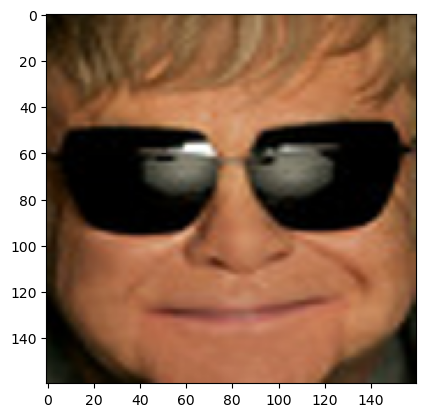

In [50]:
plt.imshow(face_pixels)

In [54]:
face_pixels = extract_face(filename)

image = Image.open(filename)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)

DeepFace.represent(
    filename,
    model_name='Facenet',
    detector_backend='mtcnn'
)

1/1 [==============================] - 0s 10ms/step
dataset/train/elton_john/httpsticketmnettmenusdamabbacdaebeafdbbCUSTOMjpg.jpg
1/1 [==============================] - 1s 708ms/step


[{'embedding': [-0.9324911832809448,
   1.2912473678588867,
   -1.534157395362854,
   0.1100832000374794,
   1.9662574529647827,
   -0.03189074248075485,
   -0.8048328757286072,
   -0.25458386540412903,
   -0.009261906147003174,
   -0.7815708518028259,
   -1.1759668588638306,
   1.1849732398986816,
   0.3628220558166504,
   0.790467381477356,
   0.017507612705230713,
   0.521639883518219,
   -0.13977529108524323,
   -1.2521655559539795,
   0.1357399821281433,
   0.32395902276039124,
   0.22615236043930054,
   0.006175125017762184,
   0.7686546444892883,
   -0.6095072627067566,
   0.30269700288772583,
   -0.5123621225357056,
   -0.2795514762401581,
   0.8297364711761475,
   0.6586529016494751,
   -1.0159940719604492,
   -2.3852498531341553,
   0.2773120105266571,
   -0.8050787448883057,
   0.48939281702041626,
   0.21763291954994202,
   -0.4186899662017822,
   1.0331642627716064,
   -0.9556415677070618,
   -0.1662745475769043,
   -1.0336214303970337,
   1.1499189138412476,
   0.70333367

In [38]:
len(embeddings[0]['embedding'])

128

## block 1: detecting faces

In [9]:
# create the detector, using default weights
detector = MTCNN()

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
#     plt.subplot(1,2,1)
#     plt.title("Original")
#     plt.imshow(pixels);plt.show()

    # extract the bounding box from the first face
    print(filename)
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
#     plt.subplot(1,2,2)
#     plt.title("Cutted")
#     plt.imshow(face);plt.show()
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [10]:
# load images and extract faces for all images in a directory
#def load_faces(directory):
#    faces = list()
#    # enumerate files
#    for filename in listdir(directory):
#        # path
#        path = directory + filename
#        # get face
#        face = extract_face(path)
#        # store
#        faces.append(face)
#    return faces

In [11]:
def extract_faces(dataset_path):
    image_extention = ("jpg", "png", "jpeg")
    get_label = lambda path_file: path_file.split(os.sep)[-2]
    X, y = [], []
    
    for file_name in glob(os.sep.join([dataset_path, "**"]), recursive=True):
        if file_name.split(".")[-1].lower() not in image_extention:
            continue
        print(file_name)
        X.append(extract_face(file_name))
        y.append(get_label(file_name))
    
    return np.array(X), np.array(y)

In [12]:
trainX, trainy = extract_faces('dataset/train')
testX, testy = extract_faces('dataset/test')

dataset/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
1/1 [==============================] - 0s 65ms/step
dataset/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
dataset/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
1/1 [==============================] - 0s 17ms/step
dataset/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
1/1 [==============================] - 0s 14ms/step
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
1/1 [==============================] - 0s 15ms/step
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
1/1 [=====================

1/1 [==============================] - 0s 60ms/step
dataset/train/elton_john/httpwwwdeadlinecomvimgnetwpcontentuploadseltonjpg.jpg
dataset/train/elton_john/httpmediapopsugarassetscomfilescbffewltonjpg.jpg
1/1 [==============================] - 0s 56ms/step
dataset/train/elton_john/httpmediapopsugarassetscomfilescbffewltonjpg.jpg
dataset/train/elton_john/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxEltonJohnJRjpg.jpg
1/1 [==============================] - 0s 182ms/step
dataset/train/elton_john/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxEltonJohnJRjpg.jpg
dataset/train/elton_john/httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/elton_john/httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg
dataset/train/mindy_kaling/httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg
1/1 [==============================] - 0s 62ms/step
dataset/train/mindy_kaling/httpsimagesnasslimagesamazoncomimagesIAQdwK

1/1 [==============================] - 0s 184ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg
dataset/train/mindy_kaling/httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg
1/1 [==============================] - 0s 11ms/step
dataset/train/mindy_kaling/httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxbabafeacbaaacabffjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxbabafeacbaaacabffjpg.jpg
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg
1/1 [==============================] - 0s 13ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg
dataset/train/mindy_kaling/httpwwwbooksforbett

1/1 [==============================] - 0s 10ms/step
dataset/train/mindy_kaling/httpwwwpictureszimbiocomgiMindyKalingLkvEhTwDeJmjpg.jpg
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxededbebccdajpg.jpg
1/1 [==============================] - 0s 333ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxededbebccdajpg.jpg
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxeedccadejpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxeedccadejpg.jpg
dataset/train/jerry_seinfeld/httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg
dataset/train/jerry_seinfeld/httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg

1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpimgtimeincnetpeopleinewsjerryseinfeldjpg.jpg
dataset/train/jerry_seinfeld/httpwwwpsychiatrictimescomsitesdefaultfilesimagesmediaPTMofficSeinfeldjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpwwwpsychiatrictimescomsitesdefaultfilesimagesmediaPTMofficSeinfeldjpg.jpg
dataset/train/jerry_seinfeld/httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
dataset/train/jerry_seinfeld/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg
1/1 [==============================] - 0s 354ms/step
dataset/train/jerry_seinfeld/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg
dataset/train/jerry_seinfeld/httpstatictherichest

1/1 [==============================] - 0s 10ms/step
dataset/test/ben_afflek/httpcsvkmeuadecafjpg.jpg
dataset/test/ben_afflek/httpcsvkmeuaafdfjpg.jpg
1/1 [==============================] - 0s 281ms/step
dataset/test/ben_afflek/httpcsvkmeuaafdfjpg.jpg
dataset/test/ben_afflek/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/test/ben_afflek/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg
dataset/test/ben_afflek/httpbpblogspotcomedLMjVpRGkSWexgsXjkNIAAAAAAAADWgFFtAUqBlhAsjpg.jpg
1/1 [==============================] - 0s 176ms/step
dataset/test/ben_afflek/httpbpblogspotcomedLMjVpRGkSWexgsXjkNIAAAAAAAADWgFFtAUqBlhAsjpg.jpg
dataset/test/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/test/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
dataset/test/daniel_díaz/IMG_4824.JPG
1/1 [====

1/1 [==============================] - 0s 101ms/step
dataset/test/daniel_díaz/IMG_4203.jpeg
dataset/test/daniel_díaz/IMG_4171.jpeg
1/1 [==============================] - 0s 179ms/step
dataset/test/daniel_díaz/IMG_4171.jpeg
dataset/test/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/test/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
dataset/test/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg
1/1 [==============================] - 0s 184ms/step
dataset/test/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg
dataset/test/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg
1/1 [==============================] - 0s 275ms/step
dataset/test/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstears

1/1 [==============================] - 0s 109ms/step
dataset/test/mindy_kaling/httpdbrbzkkbdsdcloudfrontnetwpcontentuploadsMindyKalingjpg.jpg
dataset/test/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg
1/1 [==============================] - 0s 109ms/step
dataset/test/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg
dataset/test/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg
1/1 [==============================] - 0s 15ms/step
dataset/test/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg
dataset/test/mindy_kaling/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg
1/1 [==============================] - 0s 11ms/step
dataset/test/mindy_kaling/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg
dataset/test/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindyprojectjpg.jpg
1/1 [======================

## test

1/1 [==============================] - 0s 16ms/step
dataset/train/mindy_kaling/httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg
1/1 [==============================] - 0s 14ms/step
dataset/train/daniel_díaz/AD9F5366-9430-4A4B-84DE-7E418E662D07.JPG
1/1 [==============================] - 0s 16ms/step
dataset/train/elton_john/httpspmctvlinefileswordpresscomeltonjohnjpg.jpg
1/1 [==============================] - 0s 13ms/step
dataset/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
1/1 [==============================] - 0s 13ms/step
dataset/train/madonna/httpssmediacacheakpinimgcomxffecfafddjpg.jpg
1/1 [==============================] - 0s 14ms/step
dataset/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
1/1 [==============================] - 0s 15ms/step
dataset/train/jerry_seinfeld/httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
1/1 [==============================] - 0s 14ms/step
dataset/train/elton_john/httpssmediacacheakpinimg

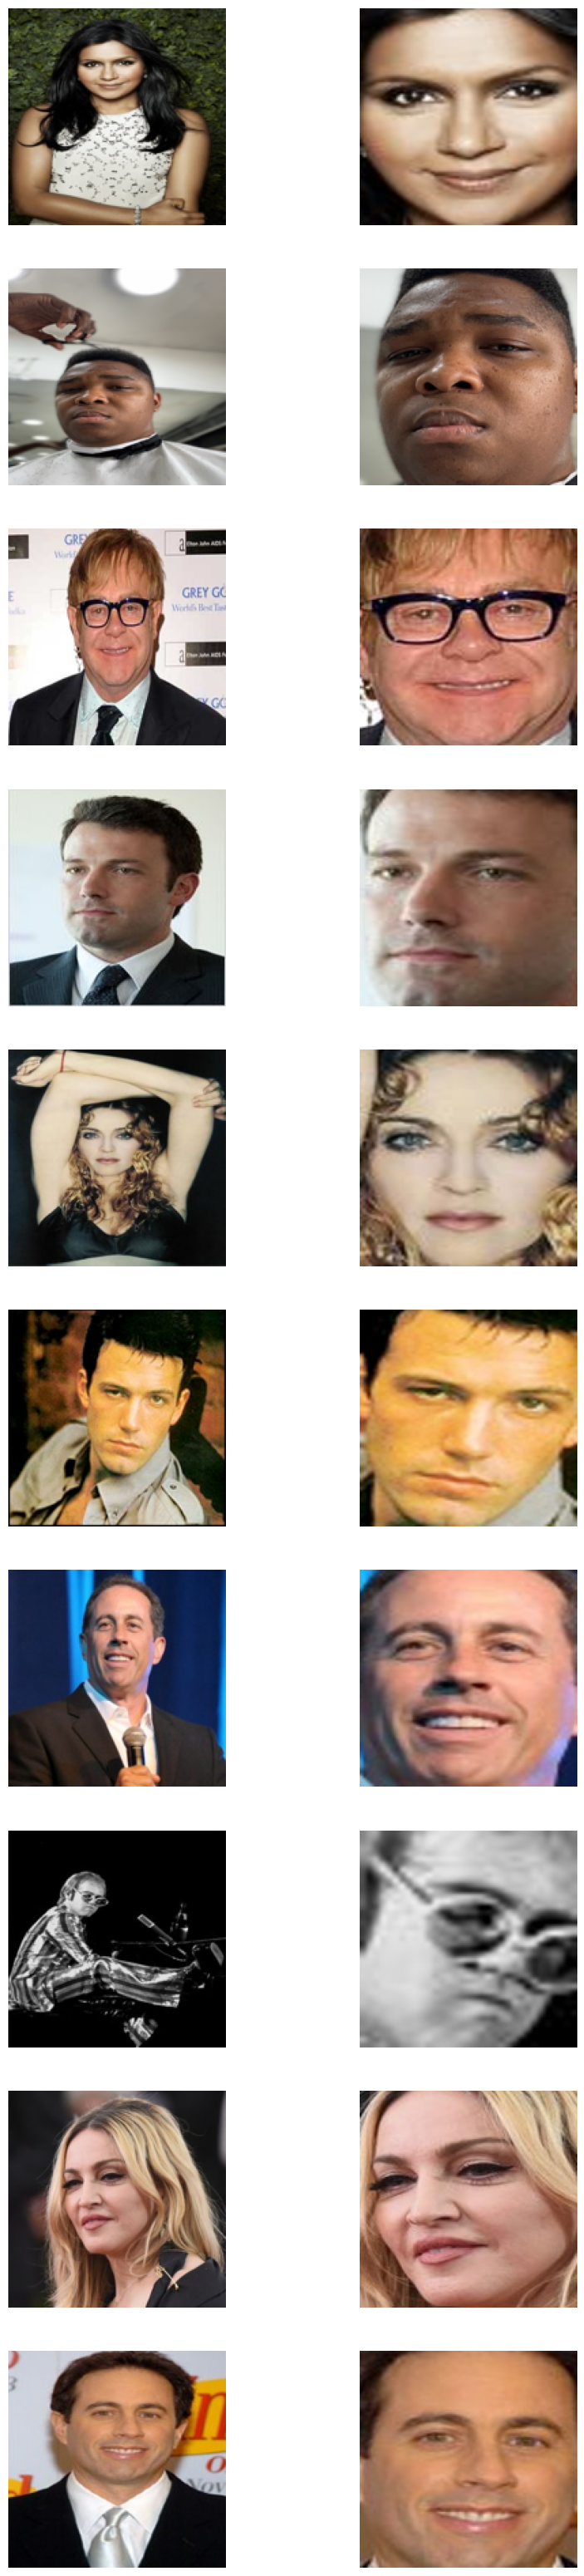

In [12]:
from random import choices
amount = 10
images_test = [x for x in glob(os.sep.join(['dataset/train', '**']), recursive=True) if x.split(".")[-1].lower() in ("jpg", "png", "jpeg")]
images_test = choices(images_test, k=amount)
fig, axs = plt.subplots(amount, 2, figsize=(10,40))
for i, filename in enumerate(images_test):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = image.resize((160, 160))
    face_array = np.asarray(image)
    axs[i, 0].axis('off')
    axs[i, 0].imshow(face_array)
    axs[i, 1].axis('off')
    axs[i, 1].imshow(extract_face(filename))


In [54]:
np.savez_compressed('dataset/5-celebrity-and-me-faces-dataset.npz', trainX, trainy, testX, testy)

In [6]:
# load a dataset that contains one subdir for each class that in turn contains images
#def load_dataset(dataset_dir_name="dataset"):
#    X, y = [], []
#    # enumerate folders, on per class
#    
#    for subdir in listdir(directory):
#        # path
#        path = directory + subdir + '/'
#        # skip any files that might be in the dir
#        if not isdir(path):
#            continue
#        # load all faces in the subdirectory
#        faces = load_faces(path)
#        # create labels
#        labels = [subdir for _ in range(len(faces))]
#        # summarize progress
#        print('>loaded %d examples for class: %s' % (len(faces), subdir))
#        # store
#        y.extend(labels)
#    return np.asarray(X), np.asarray(y)

In [23]:
## load train dataset
#trainX, trainy = load_dataset('dataset/train/')
#print(trainX.shape, trainy.shape)
## load test dataset
#testX, testy = load_dataset('dataset/val/')
#print(testX.shape, testy.shape)
## save arrays to one file in compressed format
#np.savez_compressed('dataset/5-celebrity-and-me-faces-dataset.npz', trainX, trainy, testX, testy)

## block 2: processing faces

### Load model and data

In [ ]:
# load the face dataset
data = np.load('dataset/5-celebrity-and-me-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = np.expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

# load the model
model = load_model('facenet_keras.h5')
# test
# model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(160, 160, 3))

# summarize input and output shape
print(model.inputs)
print(model.outputs)

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
np.savez_compressed('dataset/5-celebrity-and-me-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)
# test
# np.savez_compressed('dataset/5-celebrity-and-me-faces-embeddingsV2.npz', newTrainX, trainy, newTestX, testy)

## DeepFace tests

In [ ]:
from deepface import DeepFace

In [72]:
images_train = [x for x in glob(os.sep.join(['dataset/train', '**']), recursive=True) if x.split(".")[-1].lower() in ("jpg", "png", "jpeg")]
images_test = [x for x in glob(os.sep.join(['dataset/test', '**']), recursive=True) if x.split(".")[-1].lower() in ("jpg", "png", "jpeg")]
get_label = lambda path_file: path_file.split(os.sep)[-2]
extract_face_lambda = lambda x: (DeepFace.represent(x, model_name='Facenet', detector_backend='mtcnn')[0]['embedding'],get_label(x))

In [106]:
train = list(map(extract_face_lambda, images_train))
test = list(map(extract_face_lambda, images_test))

train_X, train_y = zip(*train)
test_X, test_y = zip(*test)

1/1 [==============================] - 0s 24ms/step


ValueError: Confirm that dataset/test/lucas_díaz/DSC00776.JPG exists

In [ ]:
train_X, train_y = np.asarray(train_X), np.asarray(train_y)
test_X, test_y = np.asarray(test_X), np.asarray(test_y)

In [ ]:
np.savez_compressed('dataset/5-celebrity-and-me-faces-embeddingsV2.npz', train_X, train_y, test_X, test_y)

## block 3: fit model and predict

In [ ]:
# load dataset
data = np.load('dataset/5-celebrity-and-me-faces-embeddingsV2.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print(f'Dataset: train={trainX.shape[0]}, test={testX.shape[0]}')
# normalize input vectors


# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print(f'Accuracy: train={score_train*100:.2f}%, test={score_test*100:.2f}%')

In [54]:
# load faces
data = np.load('dataset/5-celebrity-and-me-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = np.load('dataset/5-celebrity-and-me-faces-embeddingsV2.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [107]:
import joblib
with open('model.pkl', 'wb') as file:
    joblib.dump(model, file)

In [111]:
#images_train

In [114]:
model.predict([DeepFace.represent("dataset/train/lucas_díaz/IMG_4608.jpeg", model_name='Facenet', detector_backend='mtcnn')[0]['embedding']])

1/1 [==============================] - 0s 16ms/step


array([1])

In [117]:
out_encoder

LabelEncoder()

In [108]:
import joblib
with open('label_encoder.pkl', 'wb') as file:
    joblib.dump(out_encoder, file)

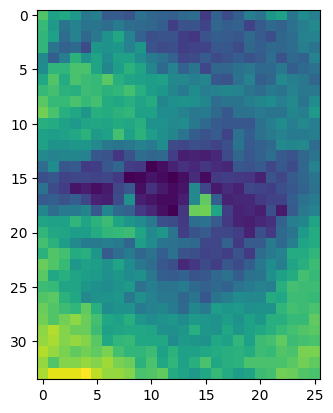

In [70]:
plt.imshow(x)

Predicted: mindy_kaling (92.380)
Expected: mindy_kaling


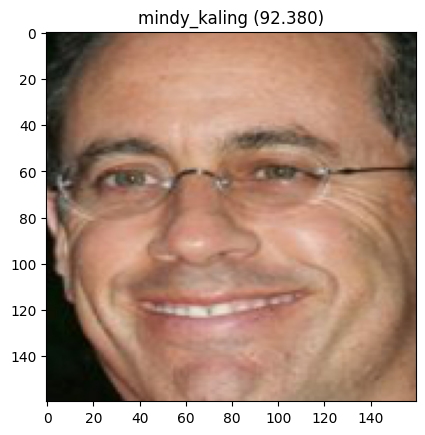

In [61]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()